In [1]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [2]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Setup WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART"
driver.get(url)

all_reviews = []

while len(all_reviews) < 300:
    time.sleep(2)  # Wait for page to load
    
    # Scroll to bottom to load lazy elements
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)
    
    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    names = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    cities = soup.find_all("p", {"class": "MztJPv"})
    dates = soup.find_all("p", {"class": "_2NsDsF"})[1::2]
    reviews = soup.find_all("div", {"class": "ZmyHeo"})
    ratings = soup.find_all("div", {"class": "XQDdHH Ga3i8K"})
    
    for i in range(len(names)):
        all_reviews.append({
            "Name": names[i].text if i < len(names) else None,
            "City": cities[i].text if i < len(cities) else None,
            "Date": dates[i].text if i < len(dates) else None,
            "Review": reviews[i].text if i < len(reviews) else None,
            "Ratings": ratings[i].text if i < len(ratings) else None
        })
    
    # Stop if we already have 300
    if len(all_reviews) >= 300:
        break
    
    # Try clicking "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']/parent::a")
        driver.execute_script("arguments[0].click();", next_button)
    except:
        print("No more pages found.")
        break

driver.quit()

# Save to CSV
df = pd.DataFrame(all_reviews[:300])  # Limit to 300
df.to_csv('flipkart_reviews_.csv', index=False, encoding='utf-8-sig')
print("Saved flipkart_reviews_.csv with", len(df), "rows")


Saved flipkart_reviews_.csv with 300 rows


In [ ]:
#Data Cleaning and Preprocessing:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     300 non-null    object
 1   City     300 non-null    object
 2   Date     300 non-null    object
 3   Review   300 non-null    object
 4   Ratings  300 non-null    object
dtypes: object(5)
memory usage: 11.8+ KB


In [4]:
# Drop the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates()
df1

,Name,City,Date,Review,Ratings
0,Thakur Surya Pratap Singh,"Certified Buyer, Hanumana",6 months ago,Awesome 😎READ MORE,5
1,bijaya mohanty,"Certified Buyer, Baleshwar","May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
2,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
3,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
4,Arunji Govindaraju,"Certified Buyer, Chennai","Feb, 2024",Awesome product very happy to hold this. Bette...,5
...,...,...,...,...,...
295,Ataur Rahaman,"Certified Buyer, Rampurhat",11 months ago,"Originally product like store,no difference,I ...",5
296,Suresh J,"Certified Buyer, Bengaluru",11 months ago,Great product from apple thank u apple team 1....,5
297,Varun giri,"Certified Buyer, New Delhi",11 months ago,BestREAD MORE,5
298,Yuvraj Singh,"Certified Buyer, Jaipur",11 months ago,Excellent!READ MORE,5


In [5]:
# Convert the Name column data into Title Case
df1['Name'] = df1['Name'].str.title()
df1.head()

,Name,City,Date,Review,Ratings
0,Thakur Surya Pratap Singh,"Certified Buyer, Hanumana",6 months ago,Awesome 😎READ MORE,5
1,Bijaya Mohanty,"Certified Buyer, Baleshwar","May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
2,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
3,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
4,Arunji Govindaraju,"Certified Buyer, Chennai","Feb, 2024",Awesome product very happy to hold this. Bette...,5


In [6]:
# Clean data of City column by removing unwanted characters/ part of string
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
df1.head()

,Name,City,Date,Review,Ratings
0,Thakur Surya Pratap Singh,Hanumana,6 months ago,Awesome 😎READ MORE,5
1,Bijaya Mohanty,Baleshwar,"May, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
2,Akshay Meena,Jaipur,"Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
3,Nikhil Kumar,Meerut Division,"Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
4,Arunji Govindaraju,Chennai,"Feb, 2024",Awesome product very happy to hold this. Bette...,5


In [7]:
# Clean data of Review column by removing unwanted characters/ part of string and converting to lowercase
df1['Review'] = df1['Review'].str.lower().str.replace("read more", "", regex=False)
df1.head(300)


,Name,City,Date,Review,Ratings
0,Thakur Surya Pratap Singh,Hanumana,6 months ago,awesome 😎,5
1,Bijaya Mohanty,Baleshwar,"May, 2024",just go for it.amazing one.beautiful camera wi...,5
2,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5
4,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5
...,...,...,...,...,...
295,Ataur Rahaman,Rampurhat,11 months ago,"originally product like store,no difference,i ...",5
296,Suresh J,Bengaluru,11 months ago,great product from apple thank u apple team 1....,5
297,Varun Giri,New Delhi,11 months ago,best,5
298,Yuvraj Singh,Jaipur,11 months ago,excellent!,5


In [ ]:
#Sentiment Analysis:

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string


In [9]:
# Tokenize each review into sentences
df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)
df1


,Name,City,Date,Review,Ratings,Reviews_t
0,Thakur Surya Pratap Singh,Hanumana,6 months ago,awesome 😎,5,[awesome 😎]
1,Bijaya Mohanty,Baleshwar,"May, 2024",just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...
2,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]"
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...
4,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesome product very happy to hold this., bet..."
...,...,...,...,...,...,...
295,Ataur Rahaman,Rampurhat,11 months ago,"originally product like store,no difference,i ...",5,"[originally product like store,no difference,i..."
296,Suresh J,Bengaluru,11 months ago,great product from apple thank u apple team 1....,5,[great product from apple thank u apple team 1...
297,Varun Giri,New Delhi,11 months ago,best,5,[best]
298,Yuvraj Singh,Jaipur,11 months ago,excellent!,5,[excellent!]


In [10]:
# Import mean from data
from statistics import mean
from textblob import TextBlob

# Function to assign polarity to each sentence in the review
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Apply get_polarity function on the 'Reviews_t' column
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)

# Function to calculate the average polarity of each review
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Apply calculate_average_polarity function
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)

# Show top 10 rows
df1.head(300)


,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Thakur Surya Pratap Singh,Hanumana,6 months ago,awesome 😎,5,[awesome 😎],[1.0],1.00
1,Bijaya Mohanty,Baleshwar,"May, 2024",just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
2,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
4,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesome product very happy to hold this., bet...","[1.0, 0.5, 0.45555555555555555]",0.65
...,...,...,...,...,...,...,...,...
295,Ataur Rahaman,Rampurhat,11 months ago,"originally product like store,no difference,i ...",5,"[originally product like store,no difference,i...",[0.375],0.38
296,Suresh J,Bengaluru,11 months ago,great product from apple thank u apple team 1....,5,[great product from apple thank u apple team 1...,[0.5222222222222223],0.52
297,Varun Giri,New Delhi,11 months ago,best,5,[best],[1.0],1.00
298,Yuvraj Singh,Jaipur,11 months ago,excellent!,5,[excellent!],[1.0],1.00


In [11]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Apply sentiment_class function on the Average_Polarity column
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)

# Display the first few rows of the DataFrame
df1


,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Thakur Surya Pratap Singh,Hanumana,6 months ago,awesome 😎,5,[awesome 😎],[1.0],1.00,extremely positive
1,Bijaya Mohanty,Baleshwar,"May, 2024",just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
2,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68,positive
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50,positive
4,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesome product very happy to hold this., bet...","[1.0, 0.5, 0.45555555555555555]",0.65,positive
...,...,...,...,...,...,...,...,...,...
295,Ataur Rahaman,Rampurhat,11 months ago,"originally product like store,no difference,i ...",5,"[originally product like store,no difference,i...",[0.375],0.38,positive
296,Suresh J,Bengaluru,11 months ago,great product from apple thank u apple team 1....,5,[great product from apple thank u apple team 1...,[0.5222222222222223],0.52,positive
297,Varun Giri,New Delhi,11 months ago,best,5,[best],[1.0],1.00,extremely positive
298,Yuvraj Singh,Jaipur,11 months ago,excellent!,5,[excellent!],[1.0],1.00,extremely positive


In [12]:
# Calculate the overall average polarity score of the dataset
polarity_score = df1['Average_Polarity'].mean().round(2)

# Print the score
print(f'Average Polarity Score : {polarity_score}')

# Classify based on the score
if polarity_score > 0.75:
    print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')


Average Polarity Score : 0.47
The Average Polarity Score is Positive


In [13]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\acer\AppData\Local\Temp\ipykernel_868\3752736062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Class', data=df1, palette='viridis')


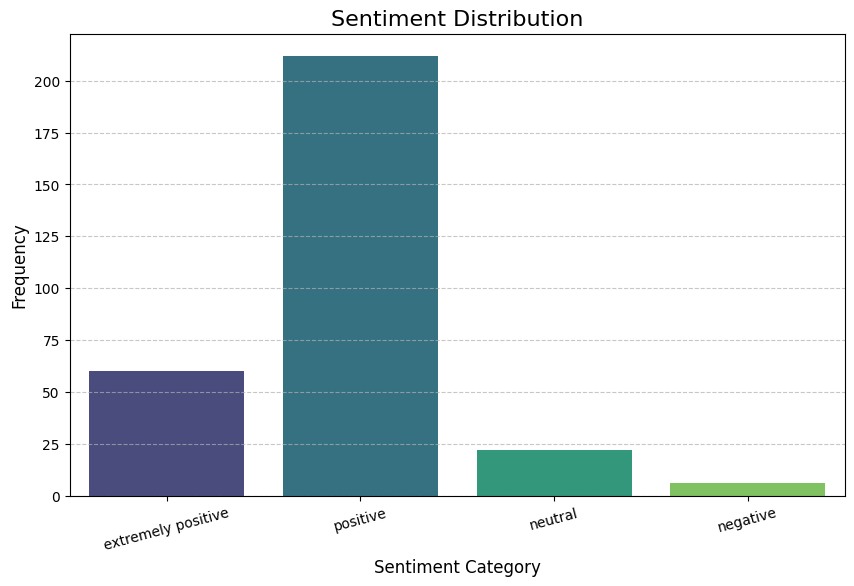

In [14]:
# Plot figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_Class', data=df1, palette='viridis')

plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

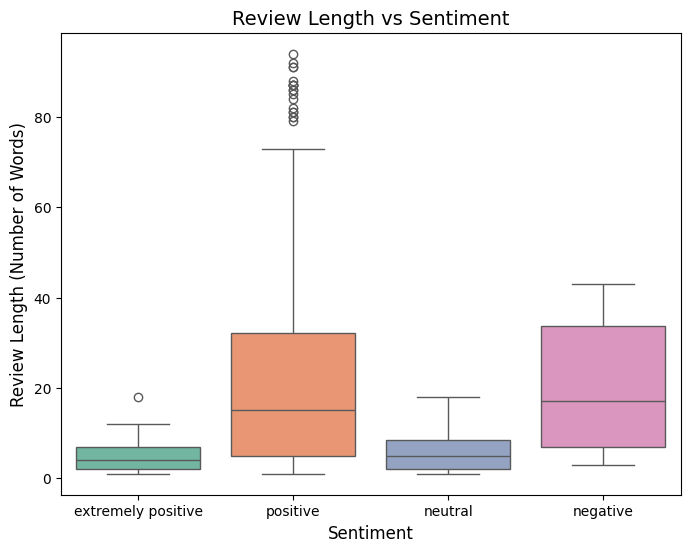

In [15]:
# Calculate the length of each review
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))
# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df1, hue='Sentiment_Class', palette='Set2')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()


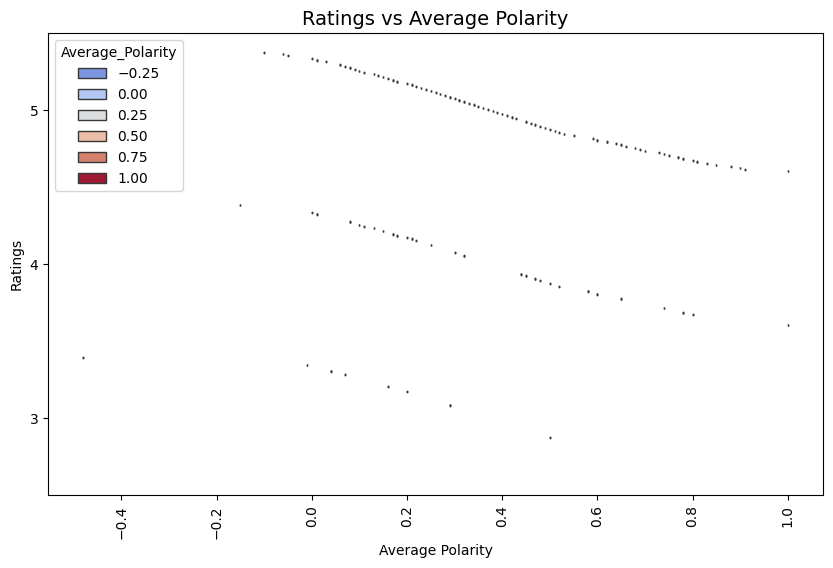

In [16]:
# Plotting ratings vs average polarity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Average_Polarity', y='Ratings', data=df1, hue = 'Average_Polarity',palette='coolwarm')
plt.title('Ratings vs Average Polarity', fontsize=14)
plt.xlabel('Average Polarity')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd


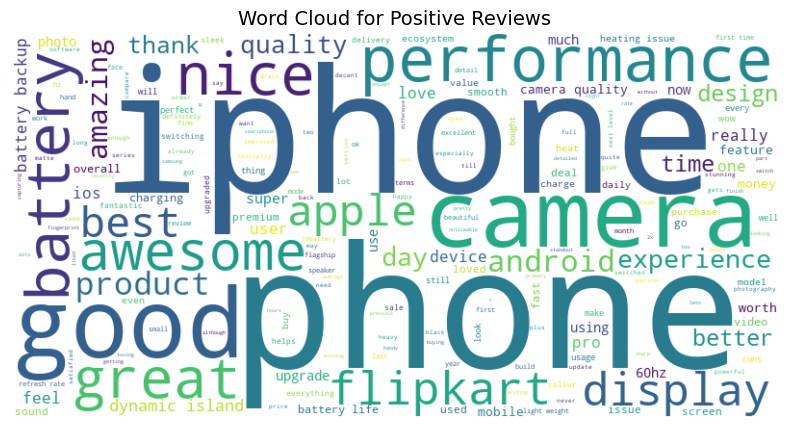

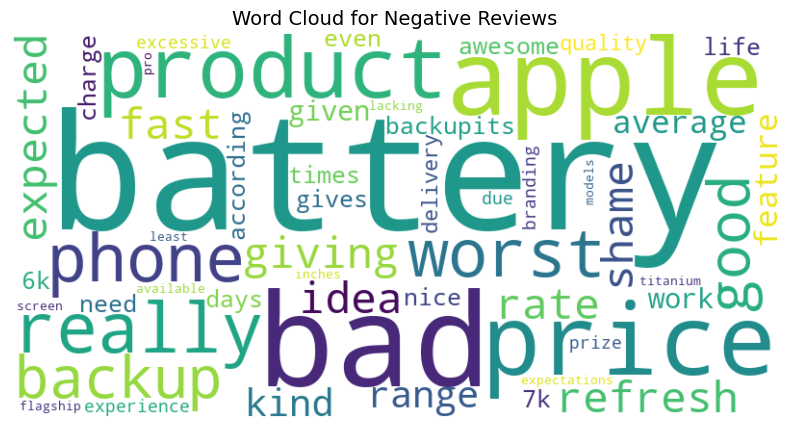

In [18]:

# Function to generate word cloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS,
        colormap='viridis'
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Separating positive and negative reviews
positive_reviews = " ".join(df1[df1['Sentiment_Class'] == 'positive']['Review'].astype(str))
negative_reviews = " ".join(df1[df1['Sentiment_Class'] == 'negative']['Review'].astype(str))

# Generate Word Clouds
generate_wordcloud(positive_reviews, "Word Cloud for Positive Reviews")
generate_wordcloud(negative_reviews, "Word Cloud for Negative Reviews")